# Phone Price Classification project using Machine Learning Project - Gian Gunawan Putra


# Background: I am a newly hired data analyst working in a startup mobile-phone company
## My boss (Bob) is asking me to determine phone price range based on their specifications, as in today's competitive market; just assuming for the prices will not cut it. We need to be as precise as possible from the get go!
## My boss had given me sales data of mobile phone of various companies to work with. The dataset source is accessible throught the link below:
## Dataset from kaggle: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data

## My Plan to tackle the issue:
### Step 1. Data exploration (data quality report, histogram, barchart, boxplot)
### Step 2. Fix dataset if there are missing values, outliers
### Step 3. Do corellation analysis to determine most important variables for prediction
### Step 4. If 'important variables' found. Do wide range of testing to obtain insights and finally best accuracy model for the dataset. Models to be used today: decision tree, random forest, KNN, logistic regression, PieceWise.

### Note:
### continuous = battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, pc, px_height, px_width, ram, sc_h, sc_w, talk_time
### categorical = blue, dual_sim, four_g, three_g, touch_screen, wifi, price_range, n_cores

In [127]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

df = pd.read_csv("train.csv")
# checking if csv can be read properly
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [128]:
# STEP 1. Data Exploration. Divide into a. continuous columns, and b. categorical columns.

# a. FOR CONTINUOUS columns (data quality report & histogram)
# battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, pc, px_height, px_width, ram, sc_h, sc_w, talk_time

# Creating data quality report with define function
def data_quality_report(df, column_name):
    # Extract the column based on column_name
    col = df[column_name]

    # formulas to obtain: count, missing %, cardinality, min, max, mean, q1, median, q3, std dev
    col_count = len(col)
    col_missing_count = col.isnull().sum()
    col_missing_percent = (col_missing_count / col_count) * 100
    col_cardinality = col.nunique()
    col_minimum = col.min()
    col_maximum = col.max()
    col_mean = col.mean()
    col_median = col.quantile(0.5)
    col_first_quartile = col.quantile(0.25)
    col_third_quartile = col.quantile(0.75)
    col_std_dev = col.std()

    # ANSI codes for bold text
    bold_start = "\033[1m"
    bold_end = "\033[0m"

    # storing all report variables in a variable.
    report = f"""{bold_start}{column_name} Data Quality Report{bold_end}
            Count: {col_count}
            Missing Count: {col_missing_count}
            Missing Percent: {col_missing_percent:}%
            Cardinality: {col_cardinality}
            Minimum: {col_minimum}
            Maximum: {col_maximum}
            Mean: {col_mean:}
            Median: {col_median}
            1st Quartile: {col_first_quartile}
            3rd Quartile: {col_third_quartile}
            Standard Deviation: {col_std_dev:}
            """
    # Printing the whole report
    print(report)

In [129]:
# histogram creation
def histogram(df, column_name):

  col = df[column_name]
  col.hist(edgecolor="black", facecolor="green", bins = 10)
  plt.title(f'Histogram of {column_name}')
  plt.xlabel(column_name)
  plt.ylabel('Frequency')
  plt.show()

battery_power Data Quality Report
            Count: 2000
            Missing Count: 0
            Missing Percent: 0.0%
            Cardinality: 1094
            Minimum: 501
            Maximum: 1998
            Mean: 1238.5185
            Median: 1226.0
            1st Quartile: 851.75
            3rd Quartile: 1615.25
            Standard Deviation: 439.4182060835312
            


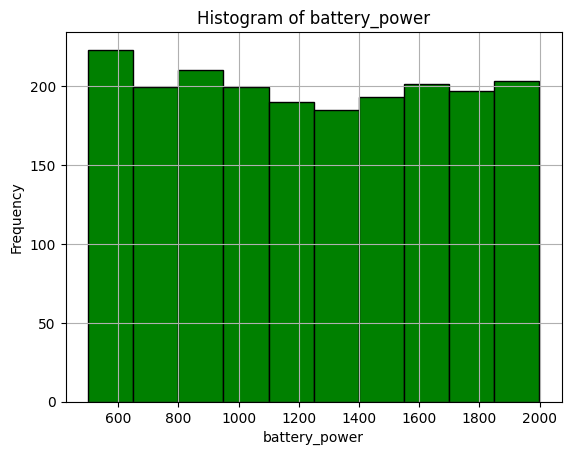

In [130]:
# Calling 2 functions created above. Repeat for each continuous columns.

data_quality_report(df, 'battery_power')
histogram(df, 'battery_power')

clock_speed Data Quality Report
            Count: 2000
            Missing Count: 0
            Missing Percent: 0.0%
            Cardinality: 26
            Minimum: 0.5
            Maximum: 3.0
            Mean: 1.52225
            Median: 1.5
            1st Quartile: 0.7
            3rd Quartile: 2.2
            Standard Deviation: 0.8160042088950705
            


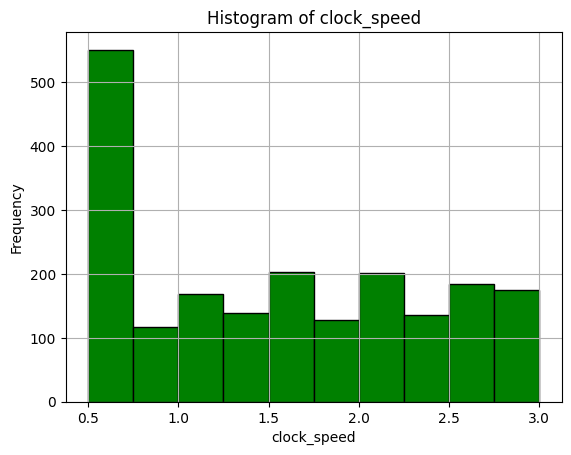

In [131]:
data_quality_report(df, 'clock_speed')
histogram(df, 'clock_speed')

fc Data Quality Report
            Count: 2000
            Missing Count: 0
            Missing Percent: 0.0%
            Cardinality: 20
            Minimum: 0
            Maximum: 19
            Mean: 4.3095
            Median: 3.0
            1st Quartile: 1.0
            3rd Quartile: 7.0
            Standard Deviation: 4.341443747983884
            


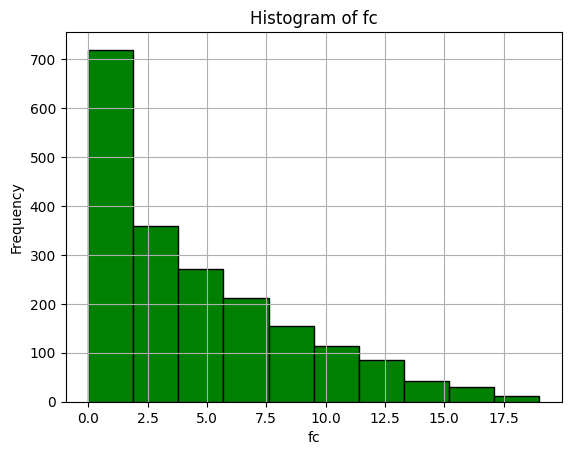

In [132]:
data_quality_report(df, 'fc')
histogram(df, 'fc')

int_memory Data Quality Report
            Count: 2000
            Missing Count: 0
            Missing Percent: 0.0%
            Cardinality: 63
            Minimum: 2
            Maximum: 64
            Mean: 32.0465
            Median: 32.0
            1st Quartile: 16.0
            3rd Quartile: 48.0
            Standard Deviation: 18.145714955206863
            


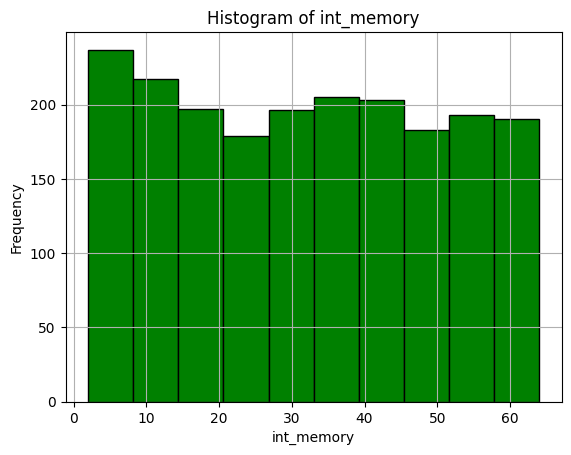

In [133]:
data_quality_report(df, 'int_memory')
histogram(df, 'int_memory')

m_dep Data Quality Report
            Count: 2000
            Missing Count: 0
            Missing Percent: 0.0%
            Cardinality: 10
            Minimum: 0.1
            Maximum: 1.0
            Mean: 0.50175
            Median: 0.5
            1st Quartile: 0.2
            3rd Quartile: 0.8
            Standard Deviation: 0.2884155496235109
            


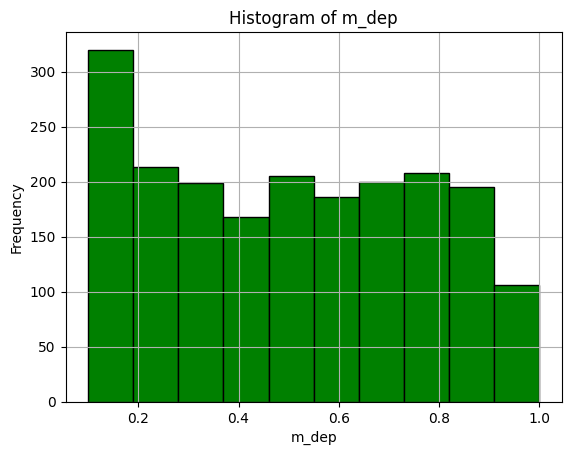

In [134]:
data_quality_report(df, 'm_dep')
histogram(df, 'm_dep')

mobile_wt Data Quality Report
            Count: 2000
            Missing Count: 0
            Missing Percent: 0.0%
            Cardinality: 121
            Minimum: 80
            Maximum: 200
            Mean: 140.249
            Median: 141.0
            1st Quartile: 109.0
            3rd Quartile: 170.0
            Standard Deviation: 35.399654896388334
            


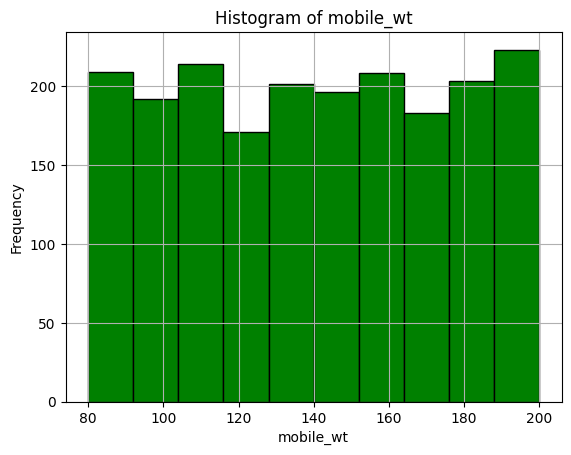

In [135]:
data_quality_report(df, 'mobile_wt')
histogram(df, 'mobile_wt')

pc Data Quality Report
            Count: 2000
            Missing Count: 0
            Missing Percent: 0.0%
            Cardinality: 21
            Minimum: 0
            Maximum: 20
            Mean: 9.9165
            Median: 10.0
            1st Quartile: 5.0
            3rd Quartile: 15.0
            Standard Deviation: 6.064314941347797
            


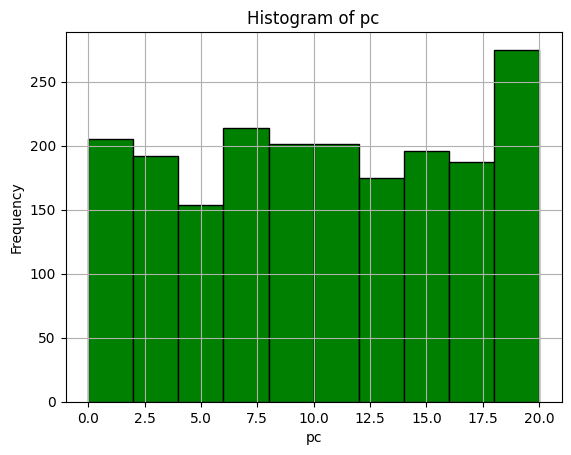

In [136]:
data_quality_report(df, 'pc')
histogram(df, 'pc')

px_height Data Quality Report
            Count: 2000
            Missing Count: 0
            Missing Percent: 0.0%
            Cardinality: 1137
            Minimum: 0
            Maximum: 1960
            Mean: 645.108
            Median: 564.0
            1st Quartile: 282.75
            3rd Quartile: 947.25
            Standard Deviation: 443.7808108064387
            


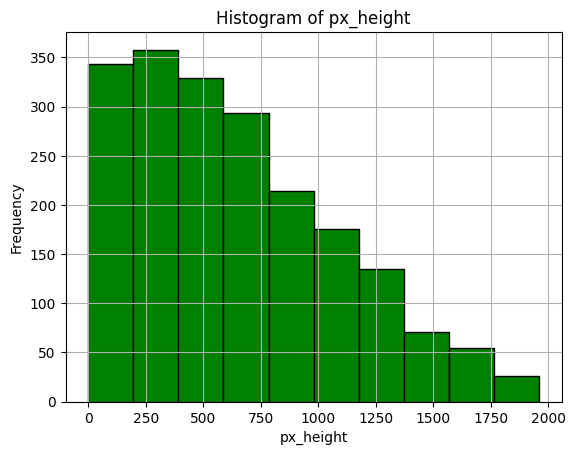

In [137]:
data_quality_report(df, 'px_height')
histogram(df, 'px_height')

px_width Data Quality Report
            Count: 2000
            Missing Count: 0
            Missing Percent: 0.0%
            Cardinality: 1109
            Minimum: 500
            Maximum: 1998
            Mean: 1251.5155
            Median: 1247.0
            1st Quartile: 874.75
            3rd Quartile: 1633.0
            Standard Deviation: 432.19944694633784
            


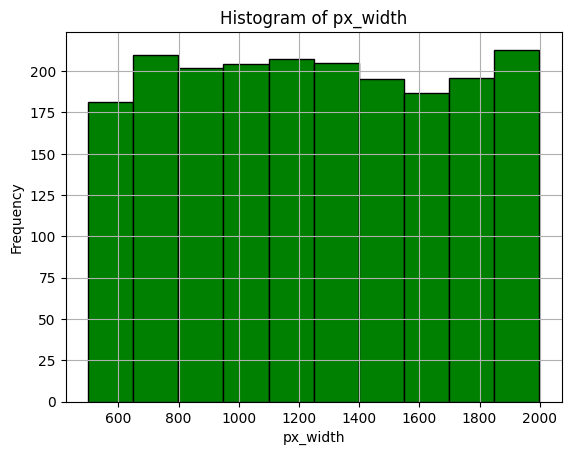

In [138]:
data_quality_report(df, 'px_width')
histogram(df, 'px_width')

ram Data Quality Report
            Count: 2000
            Missing Count: 0
            Missing Percent: 0.0%
            Cardinality: 1562
            Minimum: 256
            Maximum: 3998
            Mean: 2124.213
            Median: 2146.5
            1st Quartile: 1207.5
            3rd Quartile: 3064.5
            Standard Deviation: 1084.7320436099492
            


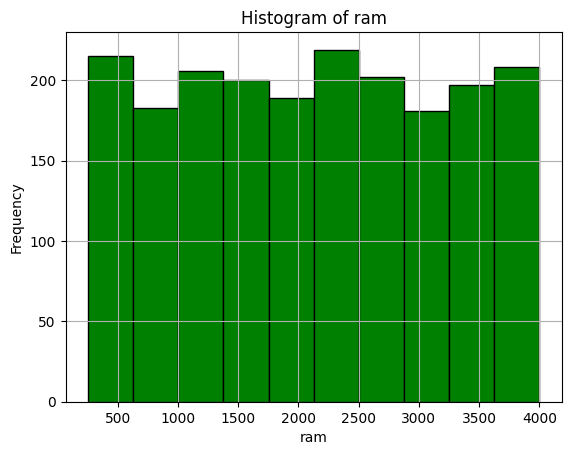

In [139]:
data_quality_report(df, 'ram')
histogram(df, 'ram')

sc_h Data Quality Report
            Count: 2000
            Missing Count: 0
            Missing Percent: 0.0%
            Cardinality: 15
            Minimum: 5
            Maximum: 19
            Mean: 12.3065
            Median: 12.0
            1st Quartile: 9.0
            3rd Quartile: 16.0
            Standard Deviation: 4.2132450043563106
            


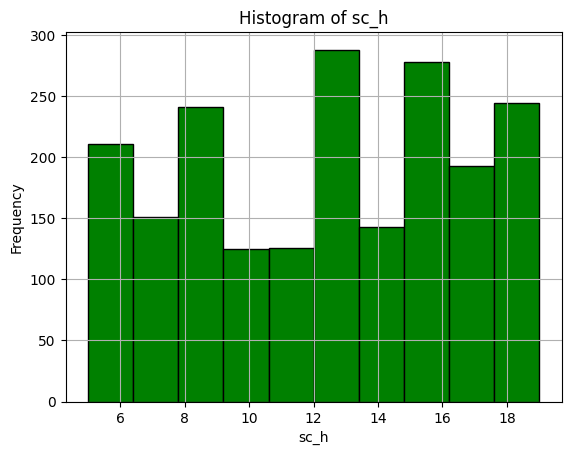

In [140]:
data_quality_report(df, 'sc_h')
histogram(df, 'sc_h')

sc_w Data Quality Report
            Count: 2000
            Missing Count: 0
            Missing Percent: 0.0%
            Cardinality: 19
            Minimum: 0
            Maximum: 18
            Mean: 5.767
            Median: 5.0
            1st Quartile: 2.0
            3rd Quartile: 9.0
            Standard Deviation: 4.356397605826395
            


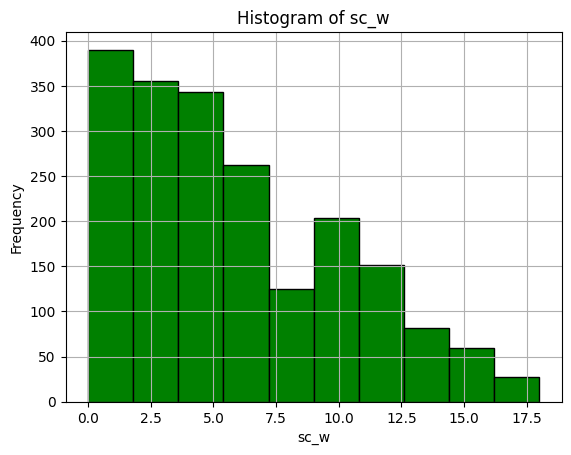

In [141]:
data_quality_report(df, 'sc_w')
histogram(df, 'sc_w')

talk_time Data Quality Report
            Count: 2000
            Missing Count: 0
            Missing Percent: 0.0%
            Cardinality: 19
            Minimum: 2
            Maximum: 20
            Mean: 11.011
            Median: 11.0
            1st Quartile: 6.0
            3rd Quartile: 16.0
            Standard Deviation: 5.463955197766686
            


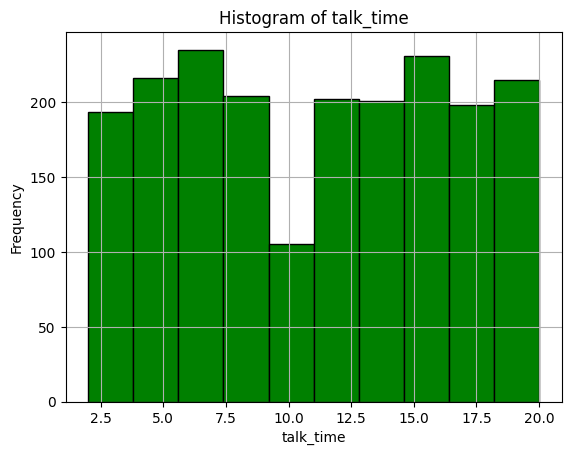

In [142]:
data_quality_report(df, 'talk_time')
histogram(df, 'talk_time')

In [143]:
# b. FOR CATEGORICAL DATA (data quality report & bar chart)
# blue, dual_sim, four_g, three_g, touch_screen, wifi, price_range, n_cores

def categorical_data_quality_report(df, column_name):
    # Extract the column based on column_name
    col = df[column_name]

    # Formulas to obtain: count, missing %, cardinality, mode, mode freq,
    # mode %, 2nd mode, 2nd mode freq, and 2nd mode freq %

    col_count = len(col)
    col_missing_count = col.isnull().sum()
    col_missing_percent = (col_missing_count / col_count) * 100
    col_cardinality = col.nunique()

    # Value count to obtain first mode name, value count iloc 0
    value_counts = col.value_counts()

    first_mode = value_counts.index[0]
    first_mode_freq = value_counts.iloc[0]
    first_mode_percent = (first_mode_freq / col_count) * 100

    # Similar with above, changing index and iloc to 1 to obtain 2nd mode numbers
    second_mode = value_counts.index[1]
    second_mode_freq = value_counts.iloc[1]
    second_mode_percent = (second_mode_freq / col_count) * 100

    # ANSI codes for bold text
    bold_start = "\033[1m"
    bold_end = "\033[0m"

    report = f"""
    {bold_start}{column_name} Data Quality Report{bold_end}
      Count: {col_count}
      Missing Count: {col_missing_count}
      Missing Percent: {col_missing_percent}%
      Cardinality: {col_cardinality}
      Mode: {first_mode}
      Mode Freq.: {first_mode_freq}
      Mode %: {first_mode_percent}%
      2nd Mode: {second_mode}
      2nd Mode Freq.: {second_mode_freq}
      2nd Mode %: {second_mode_percent} %
      """
    print(report)


In [144]:
# Bar chart creation with define function

def bar_chart(df, column_name):

# Defining col and value_counts as we are going to use it for dynamic result
  col = df[column_name]
  value_counts = col.value_counts()

# using value counts plot to create bar chart for categorical data
  value_counts.plot(kind="bar", edgecolor="black", facecolor="blue")
  plt.title(f'Bar chart of {column_name}')
  plt.xlabel(column_name)
  plt.ylabel("Frequency")
  plt.show()


    blue Data Quality Report
      Count: 2000
      Missing Count: 0
      Missing Percent: 0.0%
      Cardinality: 2
      Mode: 0
      Mode Freq.: 1010
      Mode %: 50.5%
      2nd Mode: 1
      2nd Mode Freq.: 990
      2nd Mode %: 49.5 %
      


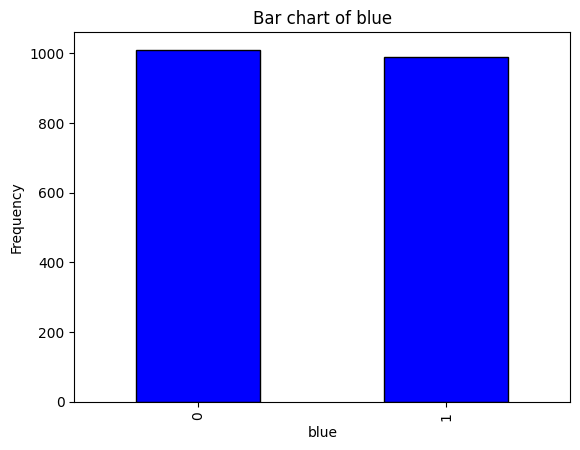

In [145]:
# Use both functions and repeat for all categorical data
categorical_data_quality_report(df, 'blue')
bar_chart(df, 'blue')


    dual_sim Data Quality Report
      Count: 2000
      Missing Count: 0
      Missing Percent: 0.0%
      Cardinality: 2
      Mode: 1
      Mode Freq.: 1019
      Mode %: 50.949999999999996%
      2nd Mode: 0
      2nd Mode Freq.: 981
      2nd Mode %: 49.05 %
      


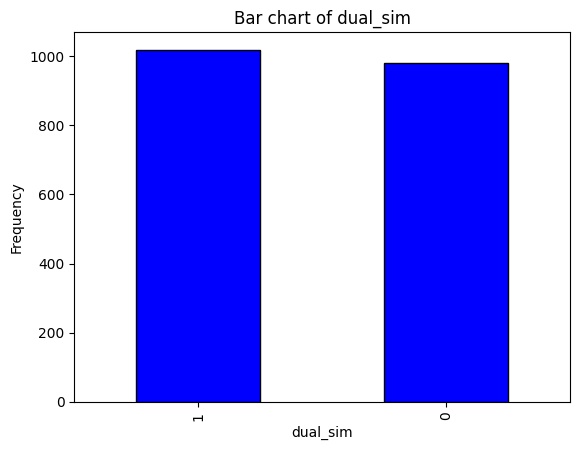

In [146]:
categorical_data_quality_report(df, 'dual_sim')
bar_chart(df, 'dual_sim')


    four_g Data Quality Report
      Count: 2000
      Missing Count: 0
      Missing Percent: 0.0%
      Cardinality: 2
      Mode: 1
      Mode Freq.: 1043
      Mode %: 52.15%
      2nd Mode: 0
      2nd Mode Freq.: 957
      2nd Mode %: 47.85 %
      


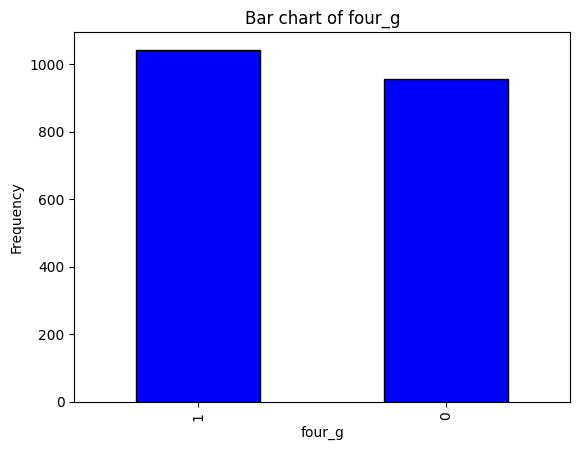

In [147]:
categorical_data_quality_report(df, 'four_g')
bar_chart(df, 'four_g')


    three_g Data Quality Report
      Count: 2000
      Missing Count: 0
      Missing Percent: 0.0%
      Cardinality: 2
      Mode: 1
      Mode Freq.: 1523
      Mode %: 76.14999999999999%
      2nd Mode: 0
      2nd Mode Freq.: 477
      2nd Mode %: 23.849999999999998 %
      


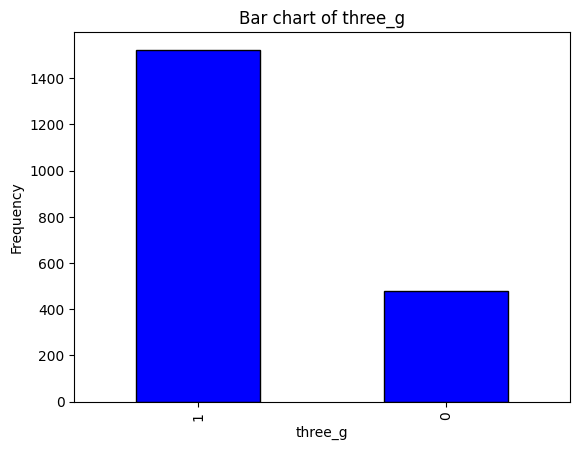

In [148]:
categorical_data_quality_report(df, 'three_g')
bar_chart(df, 'three_g')


    wifi Data Quality Report
      Count: 2000
      Missing Count: 0
      Missing Percent: 0.0%
      Cardinality: 2
      Mode: 1
      Mode Freq.: 1014
      Mode %: 50.7%
      2nd Mode: 0
      2nd Mode Freq.: 986
      2nd Mode %: 49.3 %
      


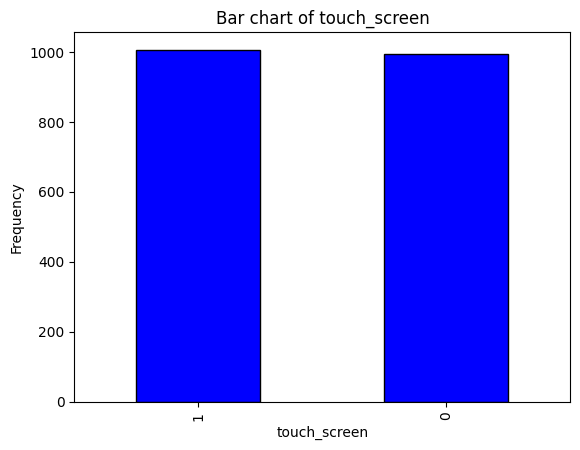

In [149]:
categorical_data_quality_report(df, 'wifi')
bar_chart(df, 'touch_screen')


    wifi Data Quality Report
      Count: 2000
      Missing Count: 0
      Missing Percent: 0.0%
      Cardinality: 2
      Mode: 1
      Mode Freq.: 1014
      Mode %: 50.7%
      2nd Mode: 0
      2nd Mode Freq.: 986
      2nd Mode %: 49.3 %
      


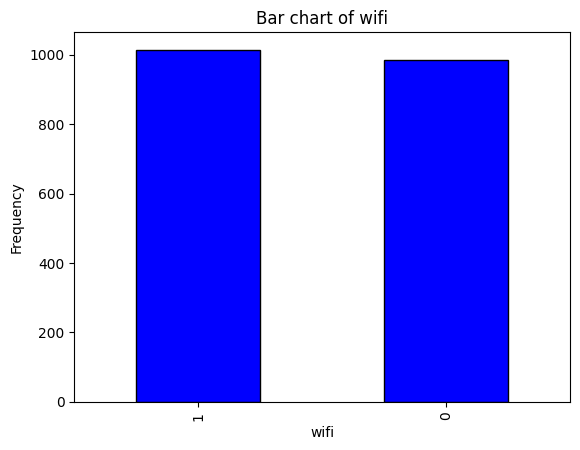

In [150]:
categorical_data_quality_report(df, 'wifi')
bar_chart(df, 'wifi')


    price_range Data Quality Report
      Count: 2000
      Missing Count: 0
      Missing Percent: 0.0%
      Cardinality: 4
      Mode: 1
      Mode Freq.: 500
      Mode %: 25.0%
      2nd Mode: 2
      2nd Mode Freq.: 500
      2nd Mode %: 25.0 %
      


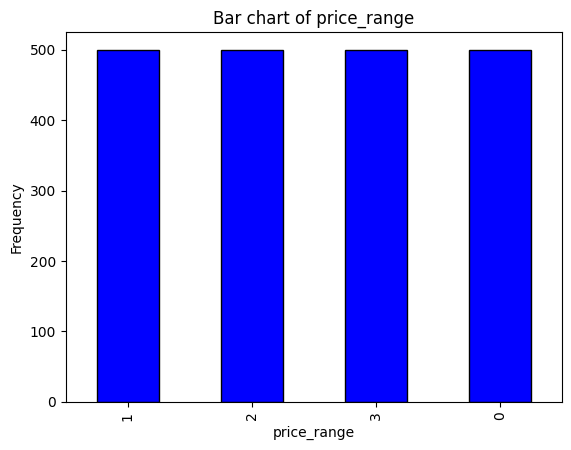

In [151]:
categorical_data_quality_report(df, 'price_range')
bar_chart(df, 'price_range')


    n_cores Data Quality Report
      Count: 2000
      Missing Count: 0
      Missing Percent: 0.0%
      Cardinality: 8
      Mode: 4
      Mode Freq.: 274
      Mode %: 13.700000000000001%
      2nd Mode: 7
      2nd Mode Freq.: 259
      2nd Mode %: 12.950000000000001 %
      


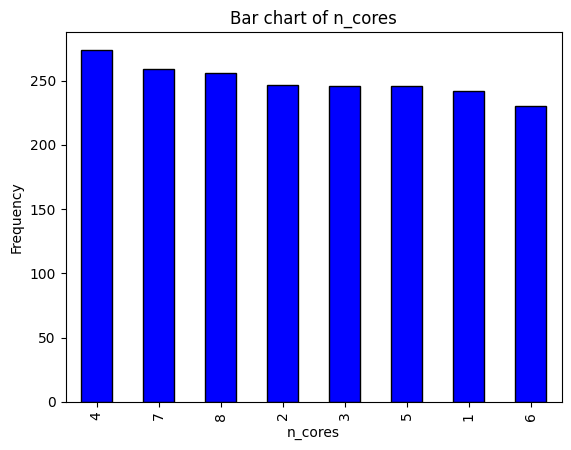

In [152]:
categorical_data_quality_report(df, 'n_cores')
bar_chart(df, 'n_cores')

# Analyzing data quality report & charts:

A. Continuous
- None have missing values
- None seemed to have outliers, but px_height and fc have highly right skewed distribution, thus we will investigate using boxplot.

B. Categorical
- None have missing values
- None seemed to have outliers
- Nothing much to note, only that there are not many phones that still uses 3G technology anymore. It seemed that 4G was already popular since 2017.

<Figure size 1200x800 with 0 Axes>

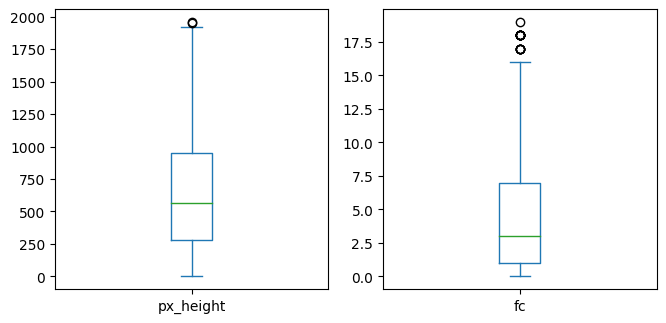

In [153]:
# Create boxplot for chosen continuous values
cont_features = ['px_height', 'fc']

# Plot box plots for the numerical features.
# the important one here is about subplots, as it is to seperate each layout
plt.figure(figsize=(12, 8))
df[cont_features].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 8))
plt.show()


# Analyzing BoxPlot
According to minimum acceptable or maximum acceptable method we can spot outliers for:
a. fc (front camera) > 15 Megapixels
b. px_height > 1,900 pixels

However, we found the following proof that these specifications indeed existed and it was not data quality issue:

A. fc > 17 Megapixels
In 2017, phones such as VIVO V7+ and OPPO R11 already had > 17 Megapixels front camera. Source:
https://www.gsmarena.com/top_10_phones_of_2017_best_selfie_cameras-news-28837.php

B. px_height > 1900 pixels
In 2017, iPhone X that was released already had px height of 2,436. Source:
 https://blisk.io/devices/details/iphone-x

With above reasoning, all observations will be kept.



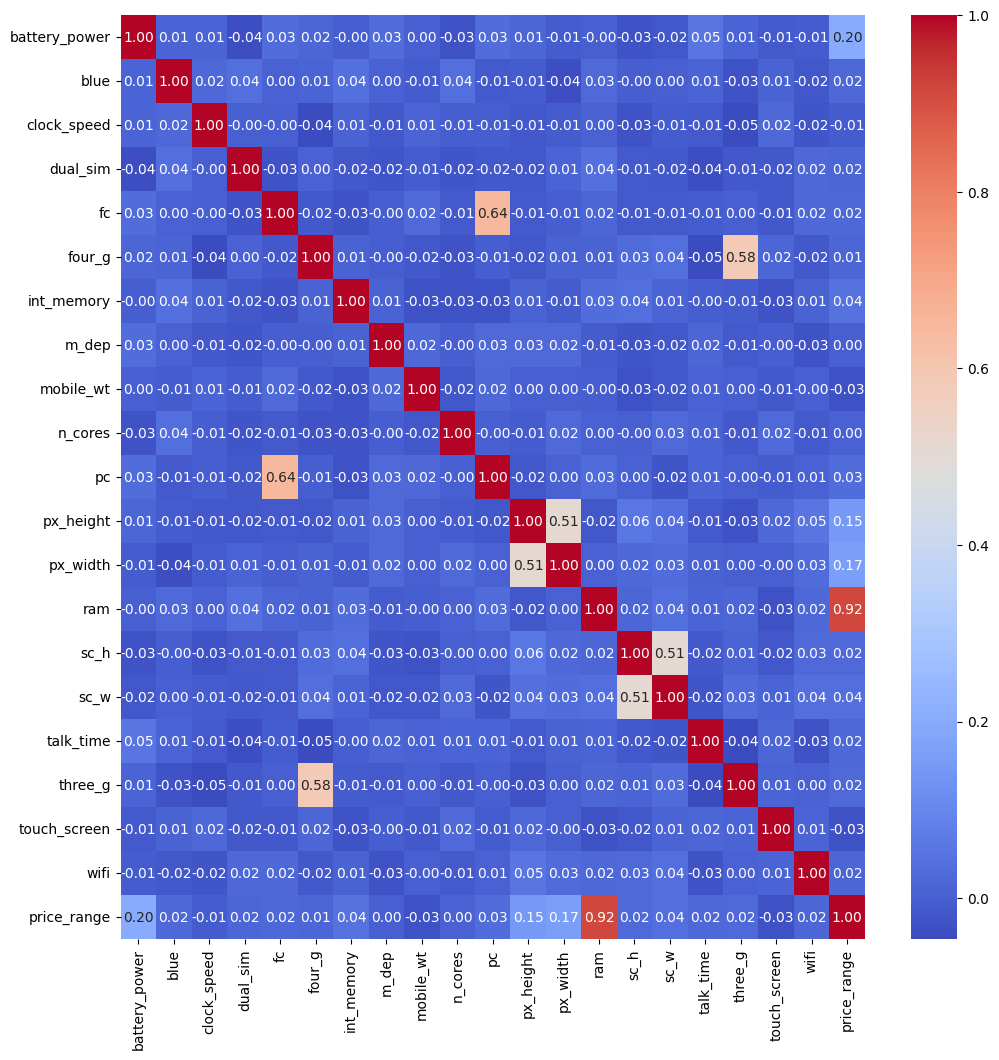

In [154]:
# STEP 3. Correlation Matrix analysis to determine important variables

# sns.heatmap is function from seaborn library to create heatmap
# annot = true is for annotation inside heatmap squares
# cmap is colormap from cool to warm color that will give clearer visibility

corr_matrix = df.corr()
plt.figure(figsize=(12, 12 ))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


# Result of correlation coefficient:
- RAM 92%! (super high! RAM seemed to correlate heavily with price range)
- Battery power 20%
- px_width 17%
- px_height 15%

Others are quite negligible. (1-4% only)

We will utilize this result as different testing set.

# STEP 4 - IMPORTANT!

With the corellation matrix result, here I will explain exactly how I plan to utilize them into 14 different tests.

## A. TESTING SET A.

### SPLIT used:

X = all columns except price range (20 variables)

y = price range

### Model used:

1. Decision tree
2. Random forest
3. KNN
4. Piecewise decision tree
5. Piecewise random forest
6. Piecewise KNN
7. Piecewise Logistic Regression

## B. TESTING SET B.

### SPLIT used:

X = RAM, battery_power, px_height, px_width (4 variables only)

y = price range

### Model used:

8. Decision tree
9. Random forest
10. KNN
11. Piecewise decision tree
12. Piecewise random forest
13. Piecewise KNN
14. Piecewise Logistic Regression

### In total, we should have 14 different test and results. The findings will be discussed afterwards.

In [155]:
# A. TESTING SET A (X = 20 variables)

# Defining variables
X = df.drop(columns=['price_range'])
y = df['price_range']

# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [156]:
# 1. Decision tree classification SET A
# putting decisiontreeclassifier() function in dt_model with limitations
dt_model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 10, random_state=42)

# training the train data.
dt_model.fit(X_train, y_train)

# Getting predictions result from X_test and X_train data
dt_y_test_hat = dt_model.predict(X_test)
dt_y_train_hat = dt_model.predict(X_train)

# Use accuracy_score function to check for overfitting
print("Accuracy score for testing data: "+ str(accuracy_score(y_test, dt_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, dt_y_train_hat)))

# Note: similar code will not be explained again

Accuracy score for testing data: 0.8525
********************************
Accuracy score for training data: 0.9175


In [157]:
#2. Random Forest classification SET A
# putting randomforestclassifier() function in rf_model
rf_model = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, n_estimators = 1000, random_state=42)

rf_model.fit(X_train, y_train)

rf_y_test_hat = rf_model.predict(X_test)
rf_y_train_hat = rf_model.predict(X_train)

print("Accuracy score for testing data: "+ str(accuracy_score(y_test, rf_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, rf_y_train_hat)))

Accuracy score for testing data: 0.885
********************************
Accuracy score for training data: 0.965625


In [158]:
#3. K Nearest Neighbors Clasiffication SET A
# putting knnclassifier() function inside knn_model
knn_model = KNeighborsClassifier(n_neighbors = 30, weights='distance')

# specifically for KNN we redefine the X so it has normalized value
X = (X - X.min())/(X.max()-X.min())

knn_model.fit(X_train, y_train)

knn_y_test_hat = knn_model.predict(X_test)
knn_y_train_hat = knn_model.predict(X_train)

print("Accuracy score for testing data: "+ str(accuracy_score(y_test, knn_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, knn_y_train_hat)))

Accuracy score for testing data: 0.965
********************************
Accuracy score for training data: 1.0


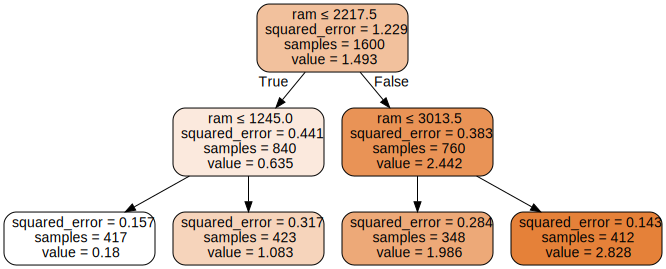

In [159]:
# PIECE WISE PREPARATION A (Creating tree model)

df = pd.read_csv("train.csv")

X = df.drop(columns=['price_range'])
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

# saving decision tree regressor function inside model_dt
model_dt = DecisionTreeRegressor(min_samples_leaf = 100, max_depth = 2)

# use the model to train training data
model_dt.fit(X_train, y_train)

# Export as dot file
dot_data = export_graphviz(
model_dt,
out_file=None,
feature_names=X_train.columns.tolist(),
filled=True,
rounded=True,
special_characters=True
)
# Generate graph from dot data
graph = graphviz.Source(dot_data)
graph

In [160]:
# PIECE WISE PREPARATION B
df = pd.read_csv("train.csv")
X_total = df.drop(columns="price_range")
y_total = df[['ram', 'price_range']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define conditions for splitting according to tree, storing into conditions variables
condition_1 = (X_train['ram'] <= 2217.5) & (X_train['ram'] <= 1245)
condition_2 = (X_train['ram'] <= 2217.5) & (X_train['ram'] > 1245.0)
condition_3 = (X_train['ram'] > 2217.5) & (X_train['ram'] <= 3013.5)
condition_4 = (X_train['ram'] > 2217.5) & (X_train['ram'] > 3013.5)

# Separate training data into four subsets (for both X and y train)
# y train is a subset of X train which is why condition above can be used
X_train_1 = X_train[condition_1]
y_train_1 = y_train[condition_1]

X_train_2 = X_train[condition_2]
y_train_2 = y_train[condition_2]

X_train_3 = X_train[condition_3]
y_train_3 = y_train[condition_3]

X_train_4 = X_train[condition_4]
y_train_4 = y_train[condition_4]

# Dropping the columns in y_train because it has been seperated already
# no need to drop in X because ram is still usable (continuous)

y_train_1 = y_train_1.drop(columns=['ram'])
y_train_2 = y_train_2.drop(columns=['ram'])
y_train_3 = y_train_3.drop(columns=['ram'])
y_train_4 = y_train_4.drop(columns=['ram'])

# Putting y_train and test inside dataframe objects
# (previously its panda series object, which make it cannot be used for ML)
# Define y_train and test as price range

y_train = y_train.to_frame()
y_test = y_test.to_frame()

y_train = y_train['price_range']
y_test = y_test['price_range']

In [161]:
# 4. Piecewise decision tree SET A

model1 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 10, random_state=42)
model2 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 10, random_state=42)
model3 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 10, random_state=42)
model4 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 10, random_state=42)

# Fitting the model (training) it with prepared Xtrain ytrain data
model1 = model1.fit(X_train_1, y_train_1)
model2 = model2.fit(X_train_2, y_train_2)
model3 = model3.fit(X_train_3, y_train_3)
model4 = model4.fit(X_train_4, y_train_4)

# Initialize empty lists to store predictions
lr_y_train_hat = []
lr_y_test_hat = []

# We iterate using the ram values that we visualize for X_train
for index, row in X_train.iterrows():
    # Determine the subset for the current row based on 'ram' values
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        # Reshape for prediction (no need to drop since RAM is continuous)
        row = row.values.reshape(1, -1)
        # Use temp_value to store predictions
        temp_value = model1.predict(row)
        # use elif for more conditions as per graph visualization
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    # Append the predicted value to y_train_hat
    lr_y_train_hat.append(temp_value[0])

# Codes below are exactly same as above but only use it for X_test
for index, row in X_test.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_test_hat.append(temp_value[0])

# Using accuracy score for both y test ytest hat, and ytrain ytrain hat for end result
print("Accuracy score for testing data: "+ str(accuracy_score(y_test, lr_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, lr_y_train_hat)))

# Similar code will not be re-explained below

Accuracy score for testing data: 0.825
********************************
Accuracy score for training data: 0.908125


In [162]:
# 5. Piecewise Random Forest SET A

model1 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, n_estimators = 1000, random_state=42)
model2 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, n_estimators = 1000, random_state=42)
model3 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, n_estimators = 1000, random_state=42)
model4 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, n_estimators = 1000, random_state=42)

model1 = model1.fit(X_train_1, y_train_1)
model2 = model2.fit(X_train_2, y_train_2)
model3 = model3.fit(X_train_3, y_train_3)
model4 = model4.fit(X_train_4, y_train_4)

# Initialize empty lists to store predictions
lr_y_train_hat = []
lr_y_test_hat = []

for index, row in X_train.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_train_hat.append(temp_value[0])

for index, row in X_test.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_test_hat.append(temp_value[0])

# Using accuracy score for both y test ytest hat, and ytrain ytrain hat for end result
print("Accuracy score for testing data: "+ str(accuracy_score(y_test, lr_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, lr_y_train_hat)))




Accuracy score for testing data: 0.8
********************************
Accuracy score for training data: 0.866875


In [163]:
# 6. Piecewise KNN SET A

model1 = KNeighborsClassifier(n_neighbors = 30, weights='distance')
model2 = KNeighborsClassifier(n_neighbors = 30, weights='distance')
model3 = KNeighborsClassifier(n_neighbors = 30, weights='distance')
model4 = KNeighborsClassifier(n_neighbors = 30, weights='distance')

# Normalization formula needed due to euclidian distance used in weight.
X = (X - X.min())/(X.max()-X.min())

model1 = model1.fit(X_train_1, y_train_1)
model2 = model2.fit(X_train_2, y_train_2)
model3 = model3.fit(X_train_3, y_train_3)
model4 = model4.fit(X_train_4, y_train_4)

lr_y_train_hat = []
lr_y_test_hat = []

for index, row in X_train.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_train_hat.append(temp_value[0])

for index, row in X_test.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_test_hat.append(temp_value[0])

print("Accuracy score for testing data: "+ str(accuracy_score(y_test, lr_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, lr_y_train_hat)))

Accuracy score for testing data: 0.9225
********************************
Accuracy score for training data: 1.0


In [164]:
# 7. Piecewise Logistic Regression SET A

model1 = LogisticRegression()
model2 = LogisticRegression()
model3 = LogisticRegression()
model4 = LogisticRegression()

model1 = model1.fit(X_train_1, y_train_1)
model2 = model2.fit(X_train_2, y_train_2)
model3 = model3.fit(X_train_3, y_train_3)
model4 = model4.fit(X_train_4, y_train_4)

lr_y_train_hat = []
lr_y_test_hat = []

for index, row in X_train.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_train_hat.append(temp_value[0])

for index, row in X_test.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_test_hat.append(temp_value[0])

print("Accuracy score for testing data: "+ str(accuracy_score(y_test, lr_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, lr_y_train_hat)))

Accuracy score for testing data: 0.7825
********************************
Accuracy score for training data: 0.80625


In [165]:
# A. TESTING SET B (X = 4 variables chosen from corellation matrix)
# Only use: battery power, px_height, px_width, ram

X = df[['battery_power', 'px_height', 'px_width', 'ram']]
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [166]:
# 8. decision tree classification SET B
dt_model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 10, random_state=42)

dt_model.fit(X_train, y_train)

dt_y_test_hat = dt_model.predict(X_test)
dt_y_train_hat = dt_model.predict(X_train)

print("Accuracy score for testing data: "+ str(accuracy_score(y_test, dt_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, dt_y_train_hat)))

Accuracy score for testing data: 0.855
********************************
Accuracy score for training data: 0.91875


In [167]:
# 9. Random Forest classification SET B

rf_model = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, n_estimators = 1000, random_state=42)

rf_model.fit(X_train, y_train)

rf_y_test_hat = rf_model.predict(X_test)
rf_y_train_hat = rf_model.predict(X_train)

print("Accuracy score for testing data: "+ str(accuracy_score(y_test, rf_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, rf_y_train_hat)))

Accuracy score for testing data: 0.93
********************************
Accuracy score for training data: 0.954375


In [168]:
# 10. K Nearest Neighbors Clasiffication SET B

knn_model = KNeighborsClassifier(n_neighbors = 30, weights='distance')
X = (X - X.min())/(X.max()-X.min())
knn_model.fit(X_train, y_train)

knn_y_test_hat = knn_model.predict(X_test)
knn_y_train_hat = knn_model.predict(X_train)

print("Accuracy score for testing data: "+ str(accuracy_score(y_test, knn_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, knn_y_train_hat)))

Accuracy score for testing data: 0.9625
********************************
Accuracy score for training data: 1.0


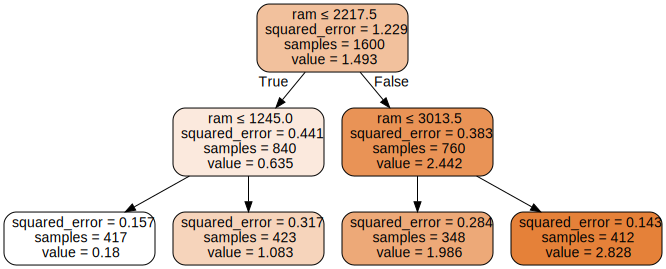

In [169]:
# Piece Wise Preparation A for TESTING SET B

# PIECE WISE PREPARATION A (Creating tree model )

df = pd.read_csv("train.csv")

X = df[['battery_power', 'px_height', 'px_width', 'ram']]
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

# saving decision tree regressor function inside model_dt
model_dt = DecisionTreeRegressor(min_samples_leaf = 100, max_depth = 2)

# use the model to train training data
model_dt.fit(X_train, y_train)

# Export as dot file
dot_data = export_graphviz(
model_dt,
out_file=None,
feature_names=X_train.columns.tolist(),
filled=True,
rounded=True,
special_characters=True
)
# Generate graph from dot data
graph = graphviz.Source(dot_data)
graph

In [170]:
# PIECE WISE PREPARATION B
df = pd.read_csv("train.csv")
X_total = df[['battery_power', 'px_height', 'px_width', 'ram']]
y_total = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

condition_1 = (X_train['ram'] <= 2217.5) & (X_train['ram'] <= 1245)
condition_2 = (X_train['ram'] <= 2217.5) & (X_train['ram'] > 1245.0)
condition_3 = (X_train['ram'] > 2217.5) & (X_train['ram'] <= 3013.5)
condition_4 = (X_train['ram'] > 2217.5) & (X_train['ram'] > 3013.5)

X_train_1 = X_train[condition_1]
y_train_1 = y_train[condition_1]

X_train_2 = X_train[condition_2]
y_train_2 = y_train[condition_2]

X_train_3 = X_train[condition_3]
y_train_3 = y_train[condition_3]

X_train_4 = X_train[condition_4]
y_train_4 = y_train[condition_4]

y_train_1 = y_train_1.drop(columns=['ram'])
y_train_2 = y_train_2.drop(columns=['ram'])
y_train_3 = y_train_3.drop(columns=['ram'])
y_train_4 = y_train_4.drop(columns=['ram'])

y_train = y_train.to_frame()
y_test = y_test.to_frame()

y_train = y_train['price_range']
y_test = y_test['price_range']


In [171]:
# 11. Piecewise Decision Tree SET B

model1 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 10, random_state=42)
model2 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 10, random_state=42)
model3 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 10, random_state=42)
model4 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 10, random_state=42)

model1 = model1.fit(X_train_1, y_train_1)
model2 = model2.fit(X_train_2, y_train_2)
model3 = model3.fit(X_train_3, y_train_3)
model4 = model4.fit(X_train_4, y_train_4)

lr_y_train_hat = []
lr_y_test_hat = []

for index, row in X_train.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_train_hat.append(temp_value[0])

for index, row in X_test.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_test_hat.append(temp_value[0])

print("Accuracy score for testing data: "+ str(accuracy_score(y_test, lr_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, lr_y_train_hat)))

Accuracy score for testing data: 0.835
********************************
Accuracy score for training data: 0.909375


In [172]:
# 12. Piecewise Random Forest SET B

model1 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, n_estimators = 1000, random_state=42)
model2 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, n_estimators = 1000, random_state=42)
model3 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, n_estimators = 1000, random_state=42)
model4 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, n_estimators = 1000, random_state=42)

model1 = model1.fit(X_train_1, y_train_1)
model2 = model2.fit(X_train_2, y_train_2)
model3 = model3.fit(X_train_3, y_train_3)
model4 = model4.fit(X_train_4, y_train_4)

lr_y_train_hat = []
lr_y_test_hat = []

for index, row in X_train.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_train_hat.append(temp_value[0])

for index, row in X_test.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_test_hat.append(temp_value[0])

print("Accuracy score for testing data: "+ str(accuracy_score(y_test, lr_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, lr_y_train_hat)))

Accuracy score for testing data: 0.8825
********************************
Accuracy score for training data: 0.935


In [173]:
# 13. Piecewise KNN SET B

model1 = KNeighborsClassifier(n_neighbors = 30, weights='distance')
model2 = KNeighborsClassifier(n_neighbors = 30, weights='distance')
model3 = KNeighborsClassifier(n_neighbors = 30, weights='distance')
model4 = KNeighborsClassifier(n_neighbors = 30, weights='distance')
X = (X - X.min())/(X.max()-X.min())

model1 = model1.fit(X_train_1, y_train_1)
model2 = model2.fit(X_train_2, y_train_2)
model3 = model3.fit(X_train_3, y_train_3)
model4 = model4.fit(X_train_4, y_train_4)

lr_y_train_hat = []
lr_y_test_hat = []

for index, row in X_train.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_train_hat.append(temp_value[0])

for index, row in X_test.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_test_hat.append(temp_value[0])

print("Accuracy score for testing data: "+ str(accuracy_score(y_test, lr_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, lr_y_train_hat)))

Accuracy score for testing data: 0.92
********************************
Accuracy score for training data: 1.0


In [174]:
# 14. Piecewise Logistic Regression SET B

model1 = LogisticRegression()
model2 = LogisticRegression()
model3 = LogisticRegression()
model4 = LogisticRegression()

model1 = model1.fit(X_train_1, y_train_1)
model2 = model2.fit(X_train_2, y_train_2)
model3 = model3.fit(X_train_3, y_train_3)
model4 = model4.fit(X_train_4, y_train_4)

lr_y_train_hat = []
lr_y_test_hat = []

for index, row in X_train.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_train_hat.append(temp_value[0])

for index, row in X_test.iterrows():
    if row['ram'] <= 2217.5 and row['ram'] <= 1245:
        row = row.values.reshape(1, -1)
        temp_value = model1.predict(row)
    elif row['ram'] <= 2217.5 and row['ram'] > 1245.0:
        row = row.values.reshape(1, -1)
        temp_value = model2.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] <= 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model3.predict(row)
    elif row['ram'] > 2217.5 and row['ram'] > 3013.5:
        row = row.values.reshape(1, -1)
        temp_value = model4.predict(row)

    lr_y_test_hat.append(temp_value[0])

print("Accuracy score for testing data: "+ str(accuracy_score(y_test, lr_y_test_hat)))
print("********************************")
print("Accuracy score for training data: "+ str(accuracy_score(y_train, lr_y_train_hat)))

Accuracy score for testing data: 0.965
********************************
Accuracy score for training data: 0.958125


# Findings:
1. From all 14 mix of models and test set data. **The best one is test 14 (Logistic regression with set B)**. This is a logistic regression model that utilized piecewise split of RAM that we obtained from model tree (this was further supported by the fact RAM's corellation coefficient to price_range is 92%). The result of **96.5% testing data and 95.8% training data accuracy showed a very high accuracy with very small gap between testing and training of 0.7% ** which shows small indication of overfitting. Which will be perfect to be utilized on new data.

2. Test 7, when logistic regression utilized on 20 X, the result was 78.25% accuracy for testing data and 80.63% accuracy for training data. This is very interesting because this means that **choosing specific variables + piecewise is much better than only using piecewise** as I assume it means that we took out some of the data noise.

3. **KNN was not chosen as best model as 100% training accuracy highly indicate potential overfitting**, and not to mention the gap was almost always at 5%. KNN was consistently getting very similar result throughout 4 types of testing (with piecewice without piecewise. 20 X or 4 X). Testing accuracy of 95.5% and training accuracy of 100%. Despite the score being high consistently everywhere,

4. **Accuracy results from 4 variables X were consistently higher than 20 variables X.** Meaning data noise does impact accuracy negatively.

5. **RAM, battery, px_width, px_height are the most important factors for determining price range.** Here are possible reasonings as to why these four variables are important. High RAM can allow for user to multitask seamlessly without lag or stuttering, high battery power can give an increased convinience as user does not need to always look for place to charge, and bigger pixel screen size would possibly allows better viewing experience for user.

Thank you for reading!